# Linear Regression

### 1 Step - Separate the variables in `training` and `testing`

In [4]:
from sklearn.model_selection import train_test_split

In [6]:
"""
x_train,x_test,y_train,y_test =train_test_split(
    x =,
    y =,
    test_size = 0.2 #20% reserved to test
)
x_train.shape # always check!!!
y_train.shape # always check!!!
x_test.shape # always check!!!
y_test.shape # always check!!!
""";

### 2 Step - Apply the Linear Regression

In [7]:
"""
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Object LM created
lm.fit(x_train,y_train) # y = a + bx
lm.intercept_ # a
lm.coef_ # b
lm.predict(x_test) # predict using model
"""

### Exemple 1

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
# Creat data

dados = {
    'idade': [20,25,30,35,40,45,50,55,60,65],
    'peso': [90,85,80,75,70,65,60,55,50,45],
    'QI': [100,150,200,250,300,350,400,450,500,550]
}

df = pd.DataFrame(dados)
df.head(3)

idade  peso   QI
0     20    90  100
1     25    85  150
2     30    80  200

In [13]:
df.corr() # correlation

idade  peso   QI
idade    1.0  -1.0  1.0
peso    -1.0   1.0 -1.0
QI       1.0  -1.0  1.0

In [85]:
sns.heatmap(
    df.corr(),
    annot = True
);

# We can note that the Age and QI are
# correlated

In [86]:
# Separet the X and Y
x = df[['idade','peso']]
y = df['QI']

In [87]:
x.head(3)

idade  peso
0     20    90
1     25    85
2     30    80

In [88]:
y.head(3)

0    100
1    150
2    200
Name: QI, dtype: int64

In [89]:
x_train,x_test,y_train,y_test =train_test_split(
    x,
    y,
    test_size = 0.3 #30% reserved to test
)

In [90]:
print(
x_train.shape, # always check!!!
y_train.shape, # always check!!!
x_test.shape, # always check!!!
y_test.shape,# always check!!!
)

(7, 2) (7,) (3, 2) (3,)


#### Training the data

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lm = LinearRegression() # Object LM created

In [93]:
lm.fit(
    x_train,
    y_train
)# y = a + bx

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
pred = lm.predict(x_test) # Prediction
dis = pd.DataFrame (y_test) # Disperson
dis['Pred_QI'] = pred # Creat a new rows

In [95]:
dis

QI  Pred_QI
6  400    400.0
3  250    250.0
5  350    350.0

In [96]:
sns.lmplot(
    x='QI',
    y='Pred_QI',
    data=dis
);

In [97]:
# Check the Score

#lm is already trained, than it get the
# x_train to create new y... and 
# compare with y_train...

lm.score(x_train,y_train)

1.0

In [98]:
# Check the Score
lm.score(x_test,y_test)

1.0

### Exemple 2

In [144]:
dados1 = {
    'idade': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
    'altura':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.9,0.95,1.0,1.0,1.1,1.3,1.32,1.5,1.6,1.62,1.75,1.80, 1.85],
    'peso': [1,3,12,16,17,20,30,32,32,30,33,32,40,45,52,56,62,59,75,82],
}

df1 = pd.DataFrame(dados1)
df1.head(3)

idade  altura  peso
0      1     0.3     1
1      2     0.4     3
2      3     0.5    12

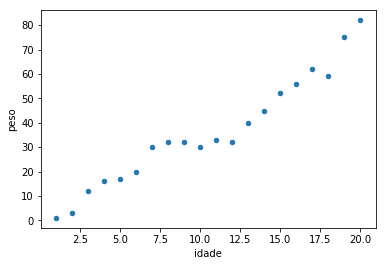

In [145]:
df1.plot(x='idade',y='peso',kind = 'scatter');

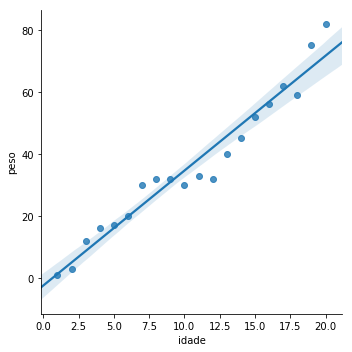

In [146]:
sns.lmplot(
    x='idade',
    y='peso',
    data=df1
);

In [147]:
sns.lmplot(
    x='idade',
    y='altura',
    data=df1
);

In [148]:
x = df1[['idade','altura']]
y = df1[['peso']]

In [149]:
# Organize the datas to Train
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(
    x,
    y,
    test_size=0.2
)

In [150]:
x_train.shape

(16, 2)

In [151]:
x_train.head(2)

idade  altura
17     18    1.75
2       3    0.50

In [152]:
y_train.head(2)

peso
17    59
2     12

In [153]:

print(len(x_train),len(y_train)) # 70% dos dados das respectivas colunas
print(len(x_test),len(y_test)) # 30% dos dados das respectivas colunas

16 16
4 4


In [154]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [159]:
# Model trained
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
# predic
pred = lm.predict(x_train)


disp = pd.DataFrame(y_train)
disp['Pred_peso'] = pred

In [167]:
disp.head()

peso  Pred_peso
17    59  65.839637
2     12   9.099372
0      1   0.173483
16    62  60.152223
15    56  58.954528

In [168]:
x_train.head()

idade  altura
17     18    1.75
2       3    0.50
0       1    0.30
16     17    1.62
15     16    1.60

In [170]:
sns.lmplot(
    x='peso',
    y='Pred_peso',
    data=disp
);

In [172]:
lm.score(x_train,y_train['peso'])

0.9592033134653623

In [173]:
lm.score(x_train,y_train['Pred_peso'])

1.0

In [174]:
lm.score(x_test,y_test)

0.9688965937308985

### Exemple 3

In [179]:
import matplotlib.pyplot as plt

In [180]:
dados = {
    'salario':[[100],[200],[500],[900],[1400],[1500],[2500],[2800],[3500],[3700],[3800]],
    'idade':[[10],[12],[14],[16],[17],[20],[21],[22],[30],[32],[35]]
}

In [181]:
X = dados['idade']
y = dados['salario']

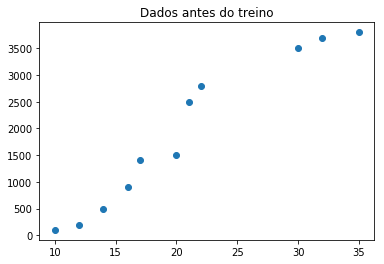

In [182]:
plt.scatter(X,y)
plt.title("Dados antes do treino")

In [183]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [184]:
lm.score(X,y)

0.935767969132932

In [185]:
lm.intercept_

array([-1531.38801262])

In [186]:
lm.coef_

array([[164.82649842]])

In [187]:
#Previsão quando a pessoa tiver 40 anos

ynew = lm.intercept_ + lm.coef_*40
ynew

array([[5061.67192429]])

In [188]:
#ou podemos fazer a previsao usando o "predict" do sklearn

prev = lm.predict([[40]])

prev

array([[5061.67192429]])

In [189]:
# comparar os valores previstos com os valores reais

prev_t = lm.predict(X)
prev_t

array([[ 116.87697161],
       [ 446.52996845],
       [ 776.1829653 ],
       [1105.83596215],
       [1270.66246057],
       [1765.14195584],
       [1929.96845426],
       [2094.79495268],
       [3413.40694006],
       [3743.05993691],
       [4237.53943218]])

In [190]:
#Erro
erro = y - prev_t
abs(erro)

array([[ 16.87697161],
       [246.52996845],
       [276.1829653 ],
       [205.83596215],
       [129.33753943],
       [265.14195584],
       [570.03154574],
       [705.20504732],
       [ 86.59305994],
       [ 43.05993691],
       [437.53943218]])

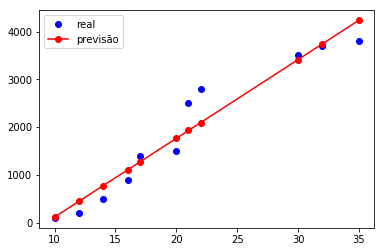

In [191]:
plt.plot(X,y,'ob',label='real')
plt.plot(X,prev_t,'o-r',label='previsão')
plt.legend()

In [192]:
xnew = np.arange(10,32,2)
ynew = lm.intercept_ + lm.coef_*xnew

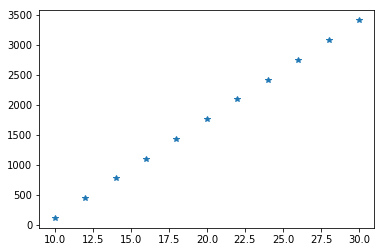

In [193]:
plt.plot(xnew,ynew[0],'*')

In [194]:
plt.plot(y,prev_t,'o-g')
# quanto mais "reto" ficar esses dados de y e yprevisto, mais coerente está o modelo com o real

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train,X_test,y_train,y_test = train_test_split(
    X,
    y,
    test_size=0.3,# 30% dos dados ficarão fora do treino
    #random_state=42,
)

In [197]:
lmnew = LinearRegression()
lmnew.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
lmnew.predict([[40]]) # Compare com o resultado sem tirar valores de test

array([[4950.0248139]])

In [199]:
lmnew.score(X_train,y_train)

0.9600421312151517

In [200]:
lmnew.score(X_test,y_test)

0.7947997432294698

In [201]:
prev_teste = lmnew.predict(X)

In [202]:
plt.plot(X,prev_teste,'o-b',label='previsao_com_teste')
plt.plot(X,prev_t,'o-r',label='previsão_sem_teste')
plt.legend()

In [203]:
plt.plot(prev_t,prev_teste,'o-b',label='Comparação')
plt.legend()


In [204]:
error_new = prev_t - prev_teste
error_new

array([[-1.13791673],
       [ 6.38108508],
       [13.90008689],
       [21.4190887 ],
       [25.1785896 ],
       [36.45709231],
       [40.21659322],
       [43.97609412],
       [74.05210135],
       [81.57110316],
       [92.84960587]])